In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: 0886081201_PN60grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.052e-04 +/- 7.386e-04 (5.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.753e+04 sec
 Using fit statistic: chi
 Using Background File                0886081201_PN60spec_bkg.fits
  Background Exposure Time: 1.753e+04 sec
 Using Response (RMF) File            0886081201_PN60spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0886081201_PN60spec.arf



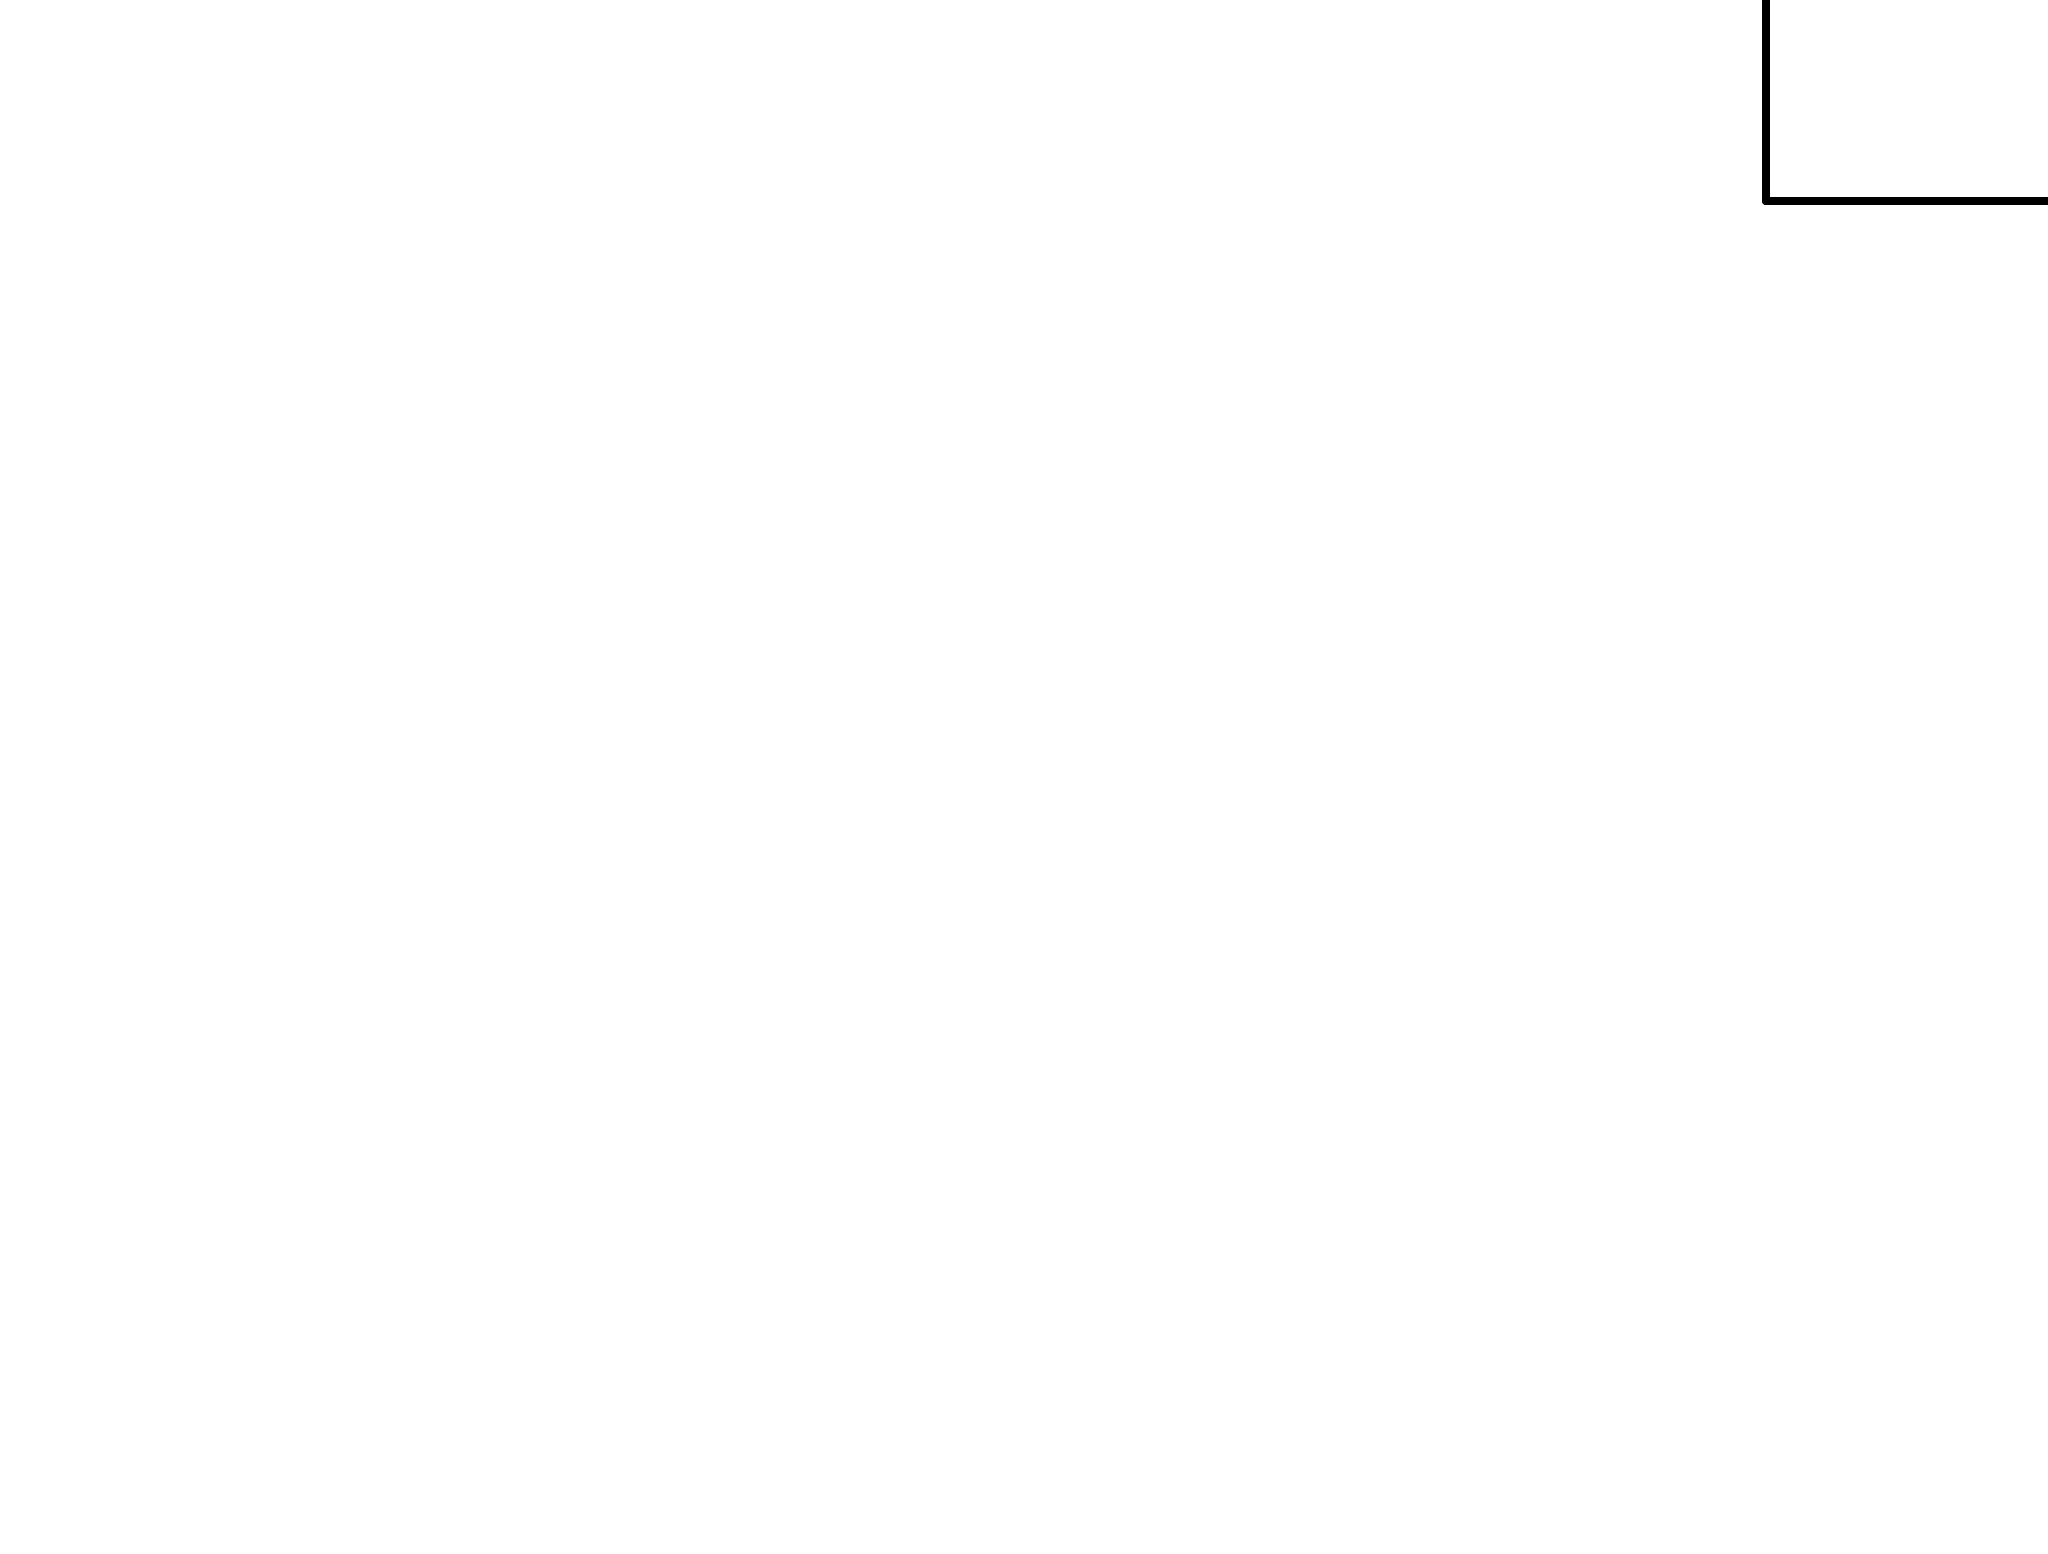

     1 channels (1) ignored in spectrum #     1
     1 channels (8) ignored in spectrum #     1



In [2]:
spec_fnames = glob.glob('*grpspec*')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.001")
Plot("data")
spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              7.091609e+10     using 6 bins.

Te

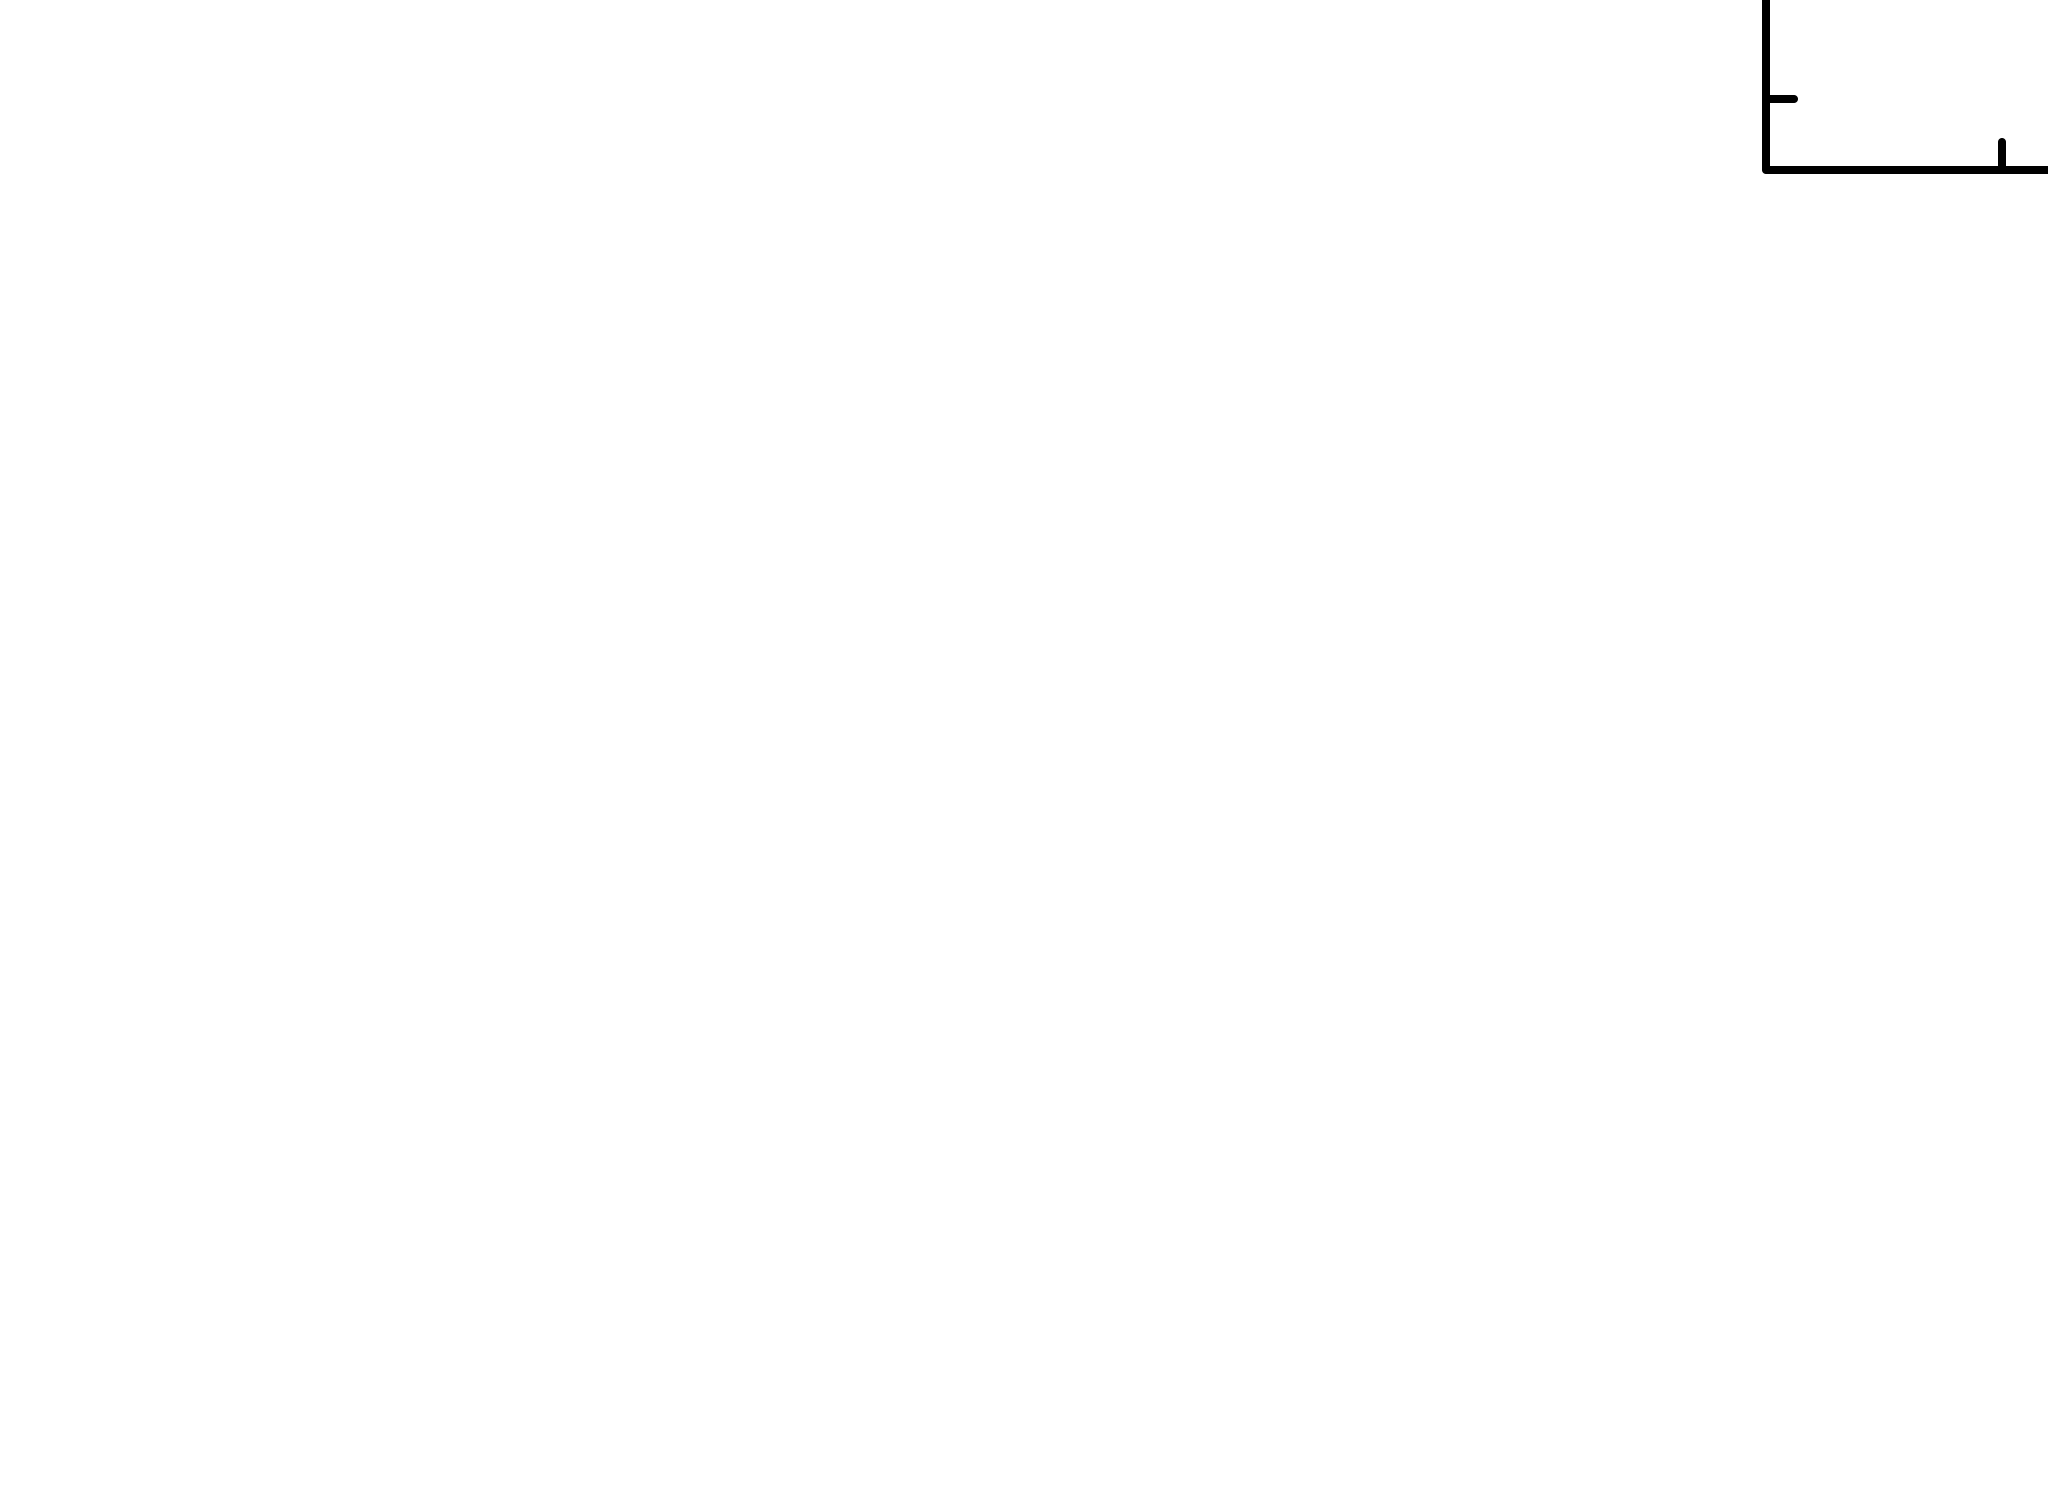

In [3]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.499314e+11     using 6 bins.

Test statistic : Chi-Squared              3.499314e+11     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
7.13674      0.195717     -1      0.775992     -0.653075   4.29603e-07
4.98392      330795       -1       3.18393      -1.17968   2.97285e-07
3.44379      308122       -2       13.0965      -1.39639   3.57028e-07
3

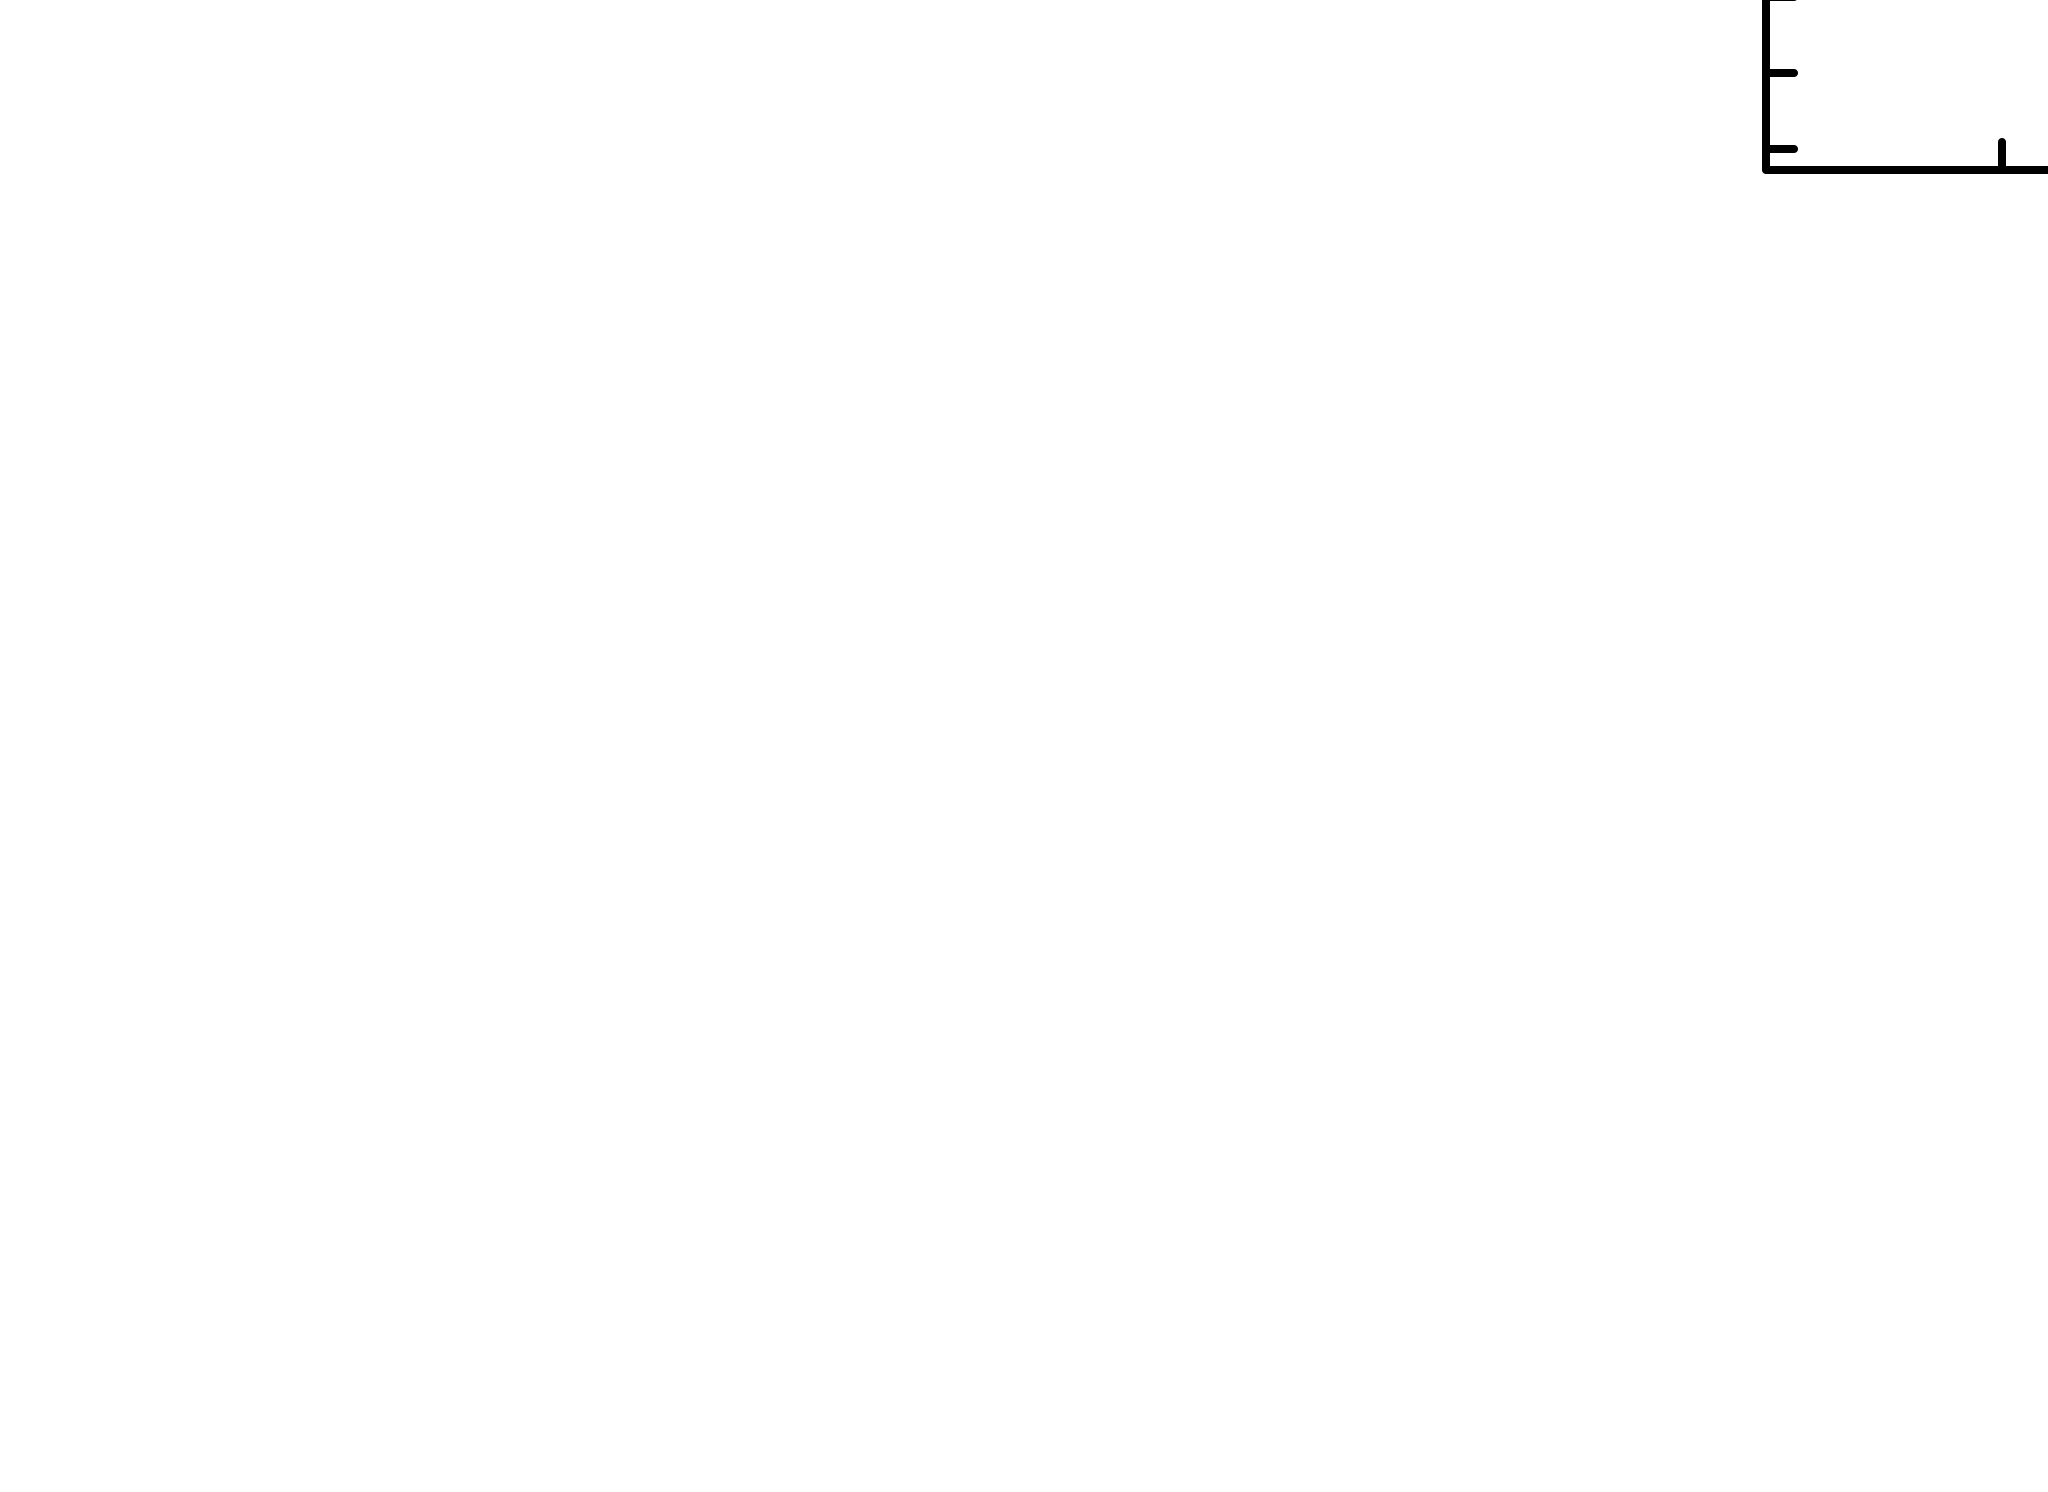

24427    -2       150.001       6.94131       34.5051
1.35263      0.00240333   -2       150.234       6.95858       35.7831
1.35215      0.00236474   -2       150.466       6.97576       37.1007
1.35168      0.00232692   -2       150.697       6.99284       38.4591
1.35122      0.00228983   -2       150.926       7.00983       39.8591
1.35076      0.00225346   -2       151.154       7.02672       41.3018
1.3503       0.0022178    -2       151.381       7.04351       42.7883
1.34986      0.00218281   -2       151.607       7.06022       44.3197
1.34941      0.0021485    -2       151.831       7.07683       45.8970
1.34897      0.00211484   -2       152.054       7.09335       47.5215
1.34854      0.00208181   -2       152.276       7.10978       49.1942
1.34811      0.0020494    -2       152.496       7.12613       50.9162
1.34768      0.00201759   -2       152.716       7.14239       52.6889
1.34726      0.00198637   -2       152.934       7.15856       54.5134
1.34685      0.00195573

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.536486e+10     using 6 bins.

Test statistic : Chi-Squared              1.536486e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
10.6219      0.140708     -3      0.283626       1.29080   2.9

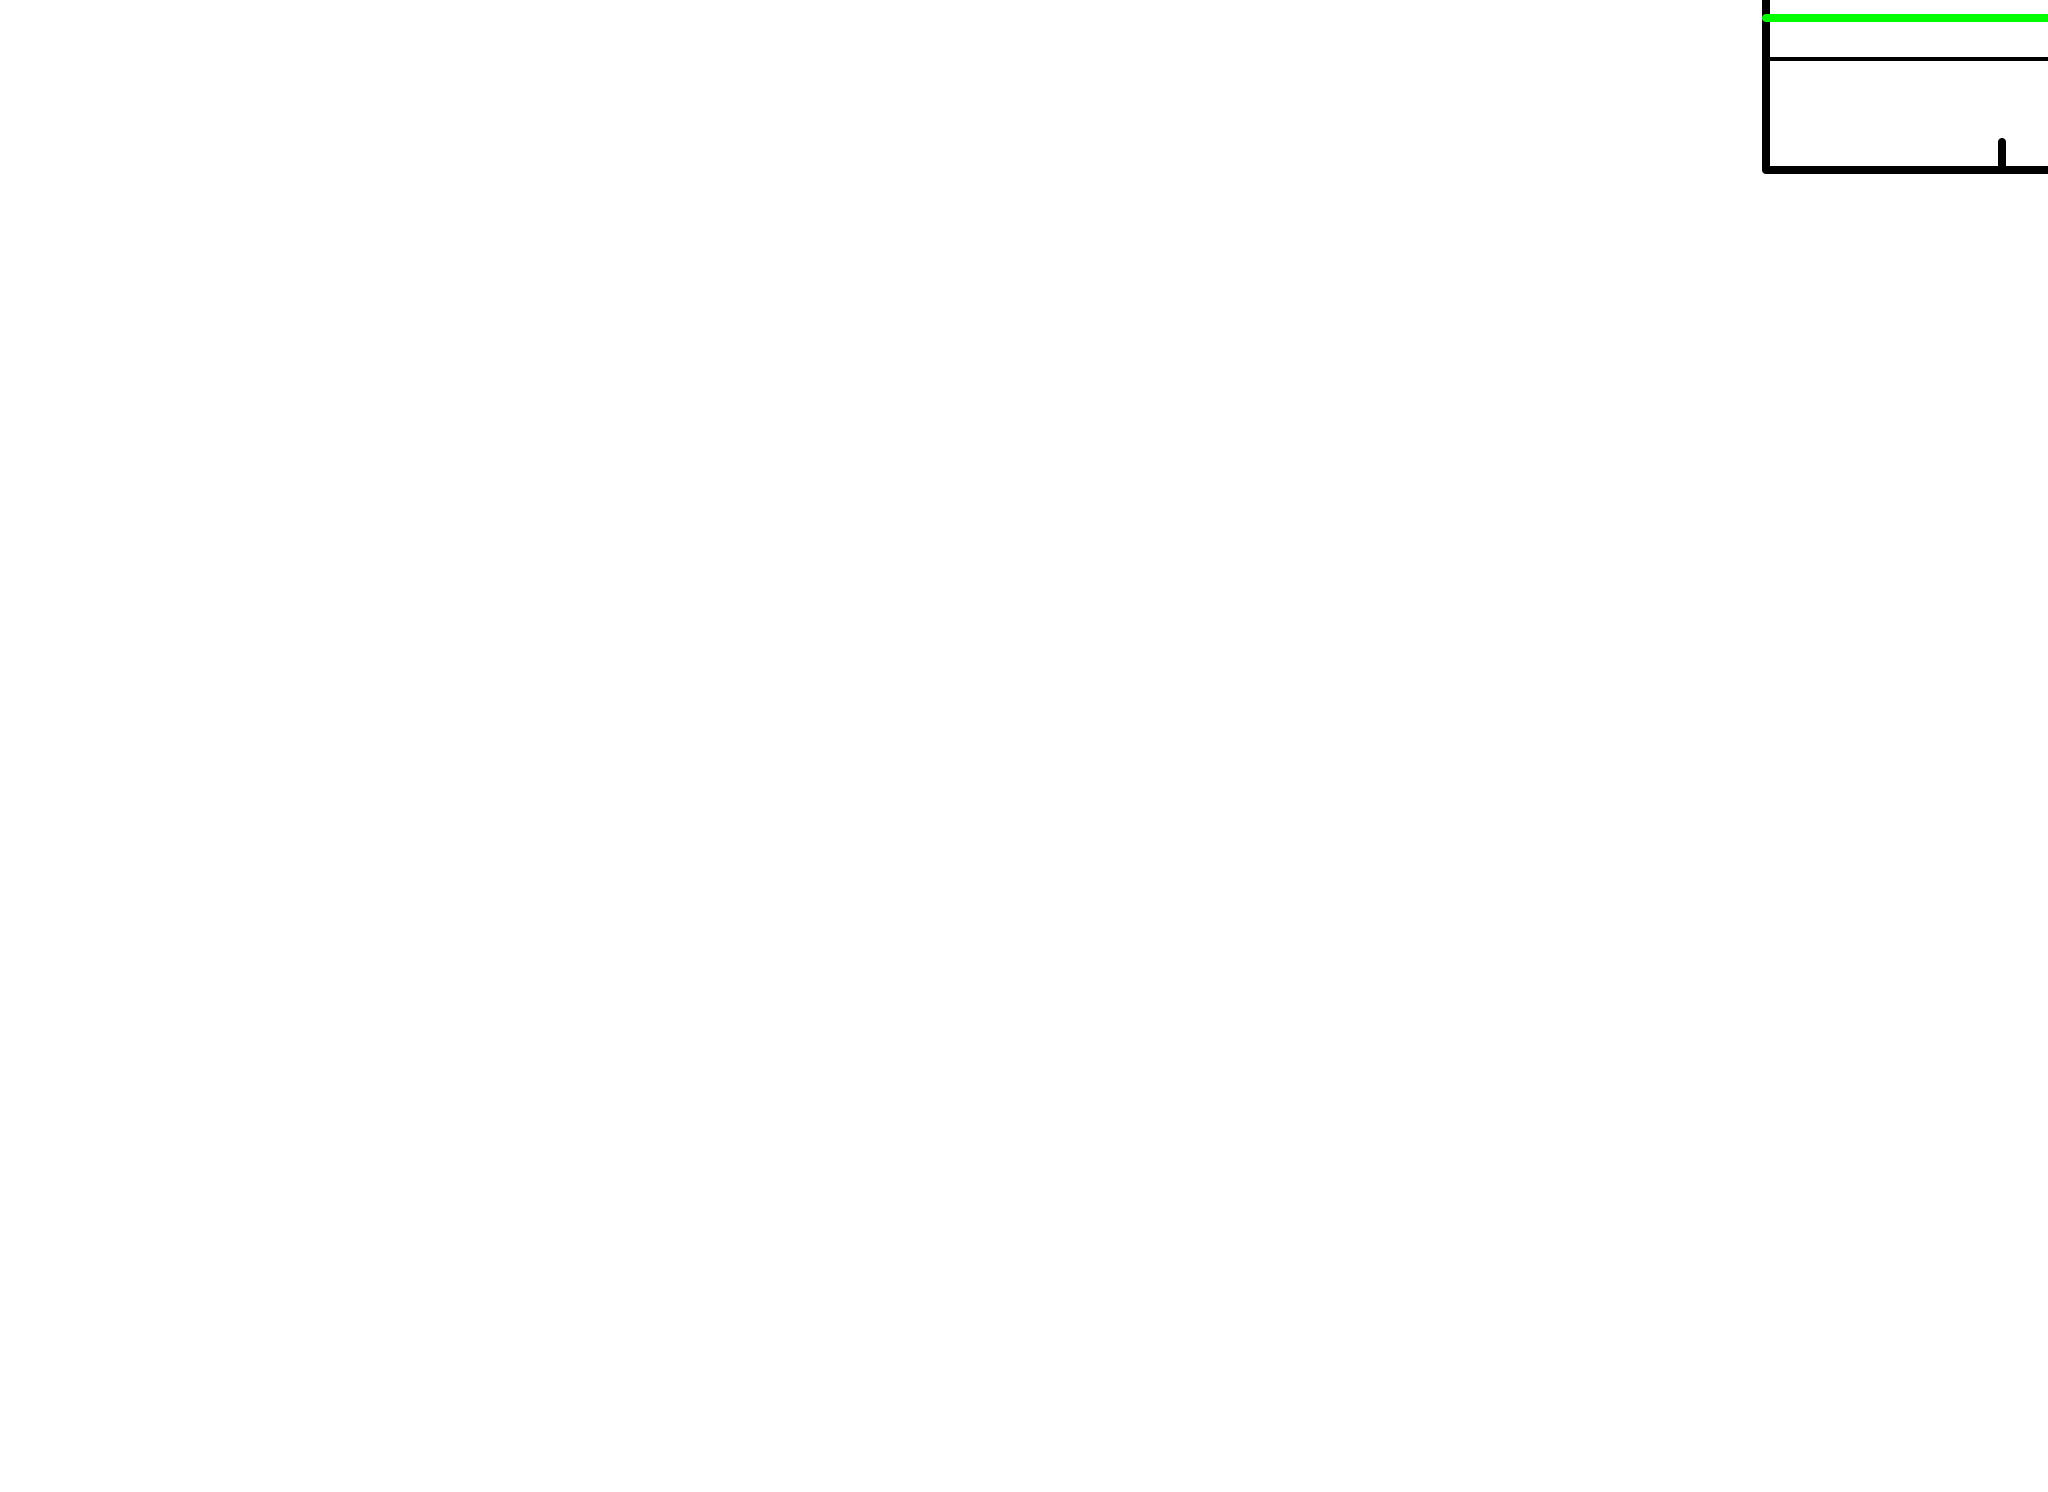

In [5]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

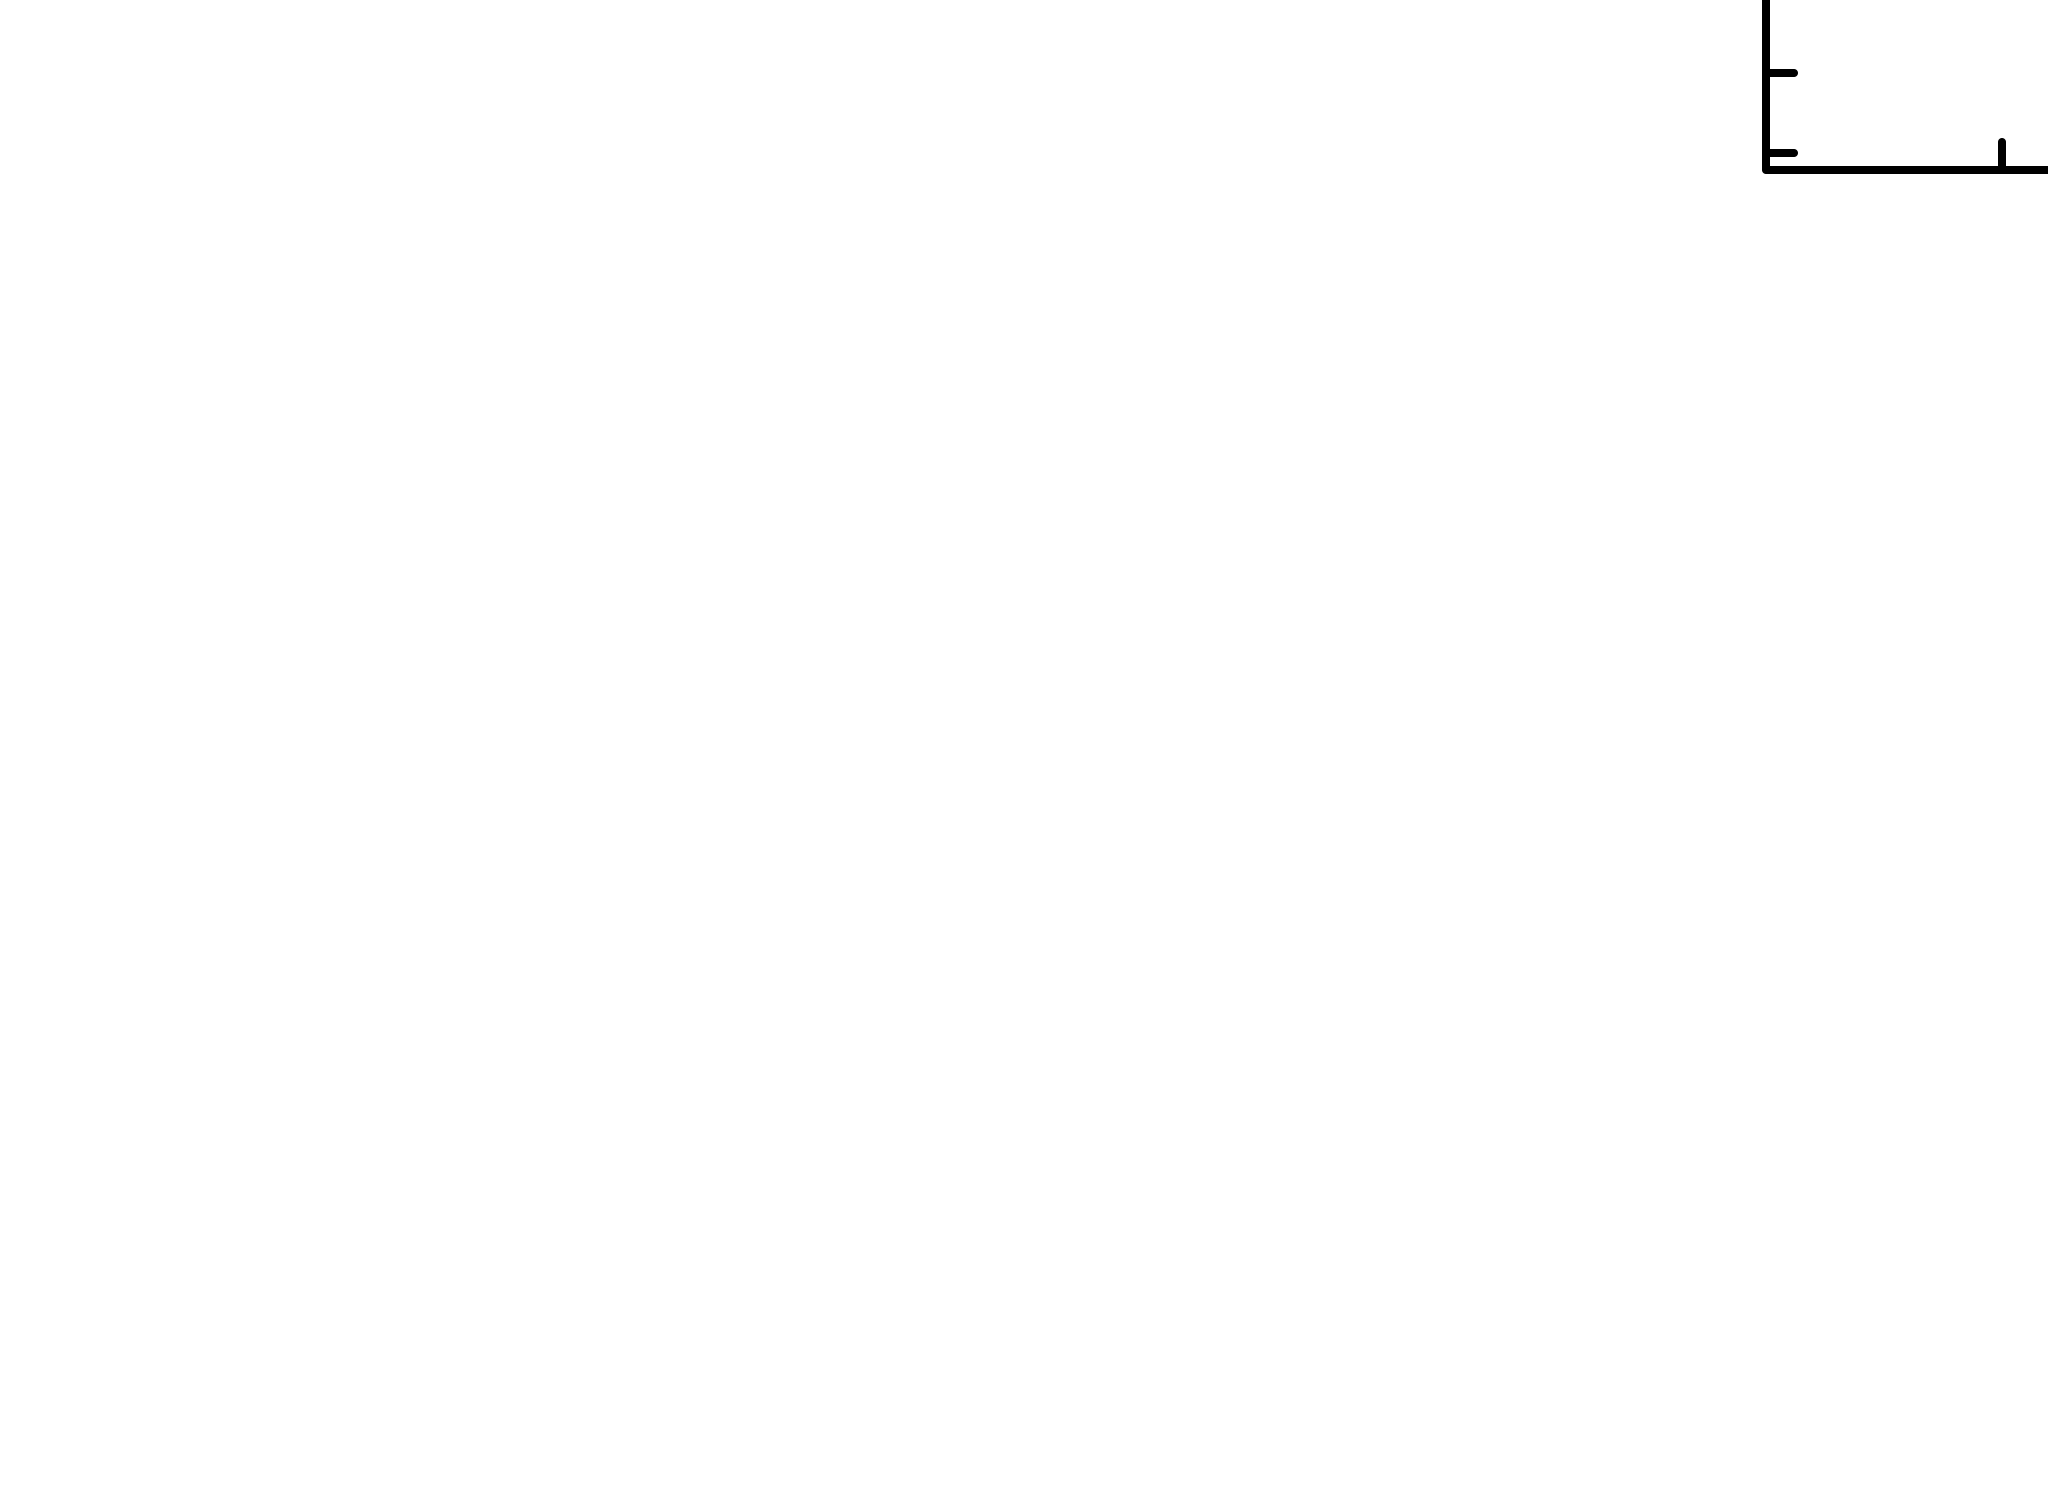


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              8.936313e+11     using 6 bins.

Test statistic : Chi-Squared              8.936313e+11     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
6.517        0.158453     -1       4.48929       3.41614   3.37939e-06
4.88875      102833       -2       19.8640       4.22636   9.58184e-06
2.22755      71164.7      -2       69.1430       1.18373   1.74997e-05
1.76

In [6]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.0679e-05 photons (1.0493e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [8]:
#plx = 2.3643
d_kpc = 8
F_x = 1.0493*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

8.032692272023552e+32


In [9]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.78)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', F_x/F_opt)

Optical Flux:  5.119049146085544e-14
F_x / F_opt:  2.04979473737302
